**TensorBoard is a visualization toolkit designed for debugging and optimizing machine learning workflows. It is commonly used with TensorFlow but can also integrate with other machine learning frameworks. TensorBoard provides a suite of interactive tools to help you understand, debug, and optimize your models.**

**Key Features of TensorBoard:**

Scalars: Monitor metrics like loss, accuracy, and other custom metrics over time.
    
Graphs: Visualize the computation graph of your neural network to understand its structure.
    
Distributions and Histograms: Analyze how tensors (weights, biases, activations) change over time.
    
Images: Display images that are part of your dataset or generated by your model.
    
Text: Log textual data such as summaries or notes.
    
Projector: Visualize embeddings (high-dimensional data reduced to 2D or 3D for better understanding).
    
Hyperparameter Tuning: Monitor and compare experiments with different hyperparameters.
    
Audio: Visualize and analyze audio signals.
    
Custom Plugins: Extend functionality with custom visualizations.

<h2 style="color:blue" align="center">Tensorboard demo using handwritten digits classification using neural network</h2>

In this notebook we will classify handwritten digits using a simple neural network which has only input and output layers. We will than add a hidden layer and see how the performance of the model improves

In [14]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [15]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [16]:
len(X_train)

60000

In [17]:
len(X_test)

10000

In [18]:
X_train[0].shape

(28, 28)

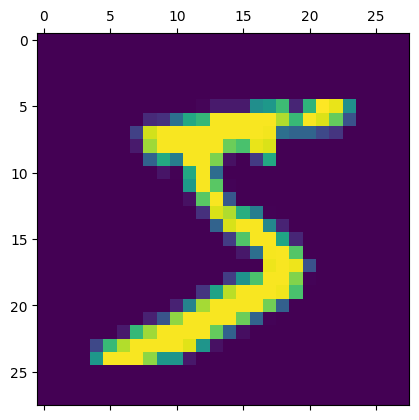

In [19]:
plt.matshow(X_train[0])

In [20]:
y_train[0]

5

In [21]:
X_train = X_train / 255
X_test = X_test / 255

In [22]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [23]:
X_train_flattened.shape

(60000, 784)

**what is mean by EPOCH ?**

In deep learning, an epoch is a complete pass through the entire training dataset during the training process of a machine learning model. It is a fundamental concept for understanding how models learn from data.

**For example:**

If your dataset has 1,000 images, one epoch means the model sees all 1,000 images once.
    
Usually, you train the model for multiple epochs so it can learn better.

Too few epochs → the model might not learn enough.
Too many epochs → the model might overfit (perform well on training but poorly on new data).


<h3 style='color:purple'>Using Flatten layer so that we don't have to call .reshape on input dataset</h3>

In [24]:
import tensorflow as tf
import datetime

# Define log directory
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

# Example model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1)
])
model.compile(optimizer='adam', loss='mse')

# Dummy data
x = tf.random.normal((100, 10))
y = tf.random.normal((100, 1))

# Train the model with TensorBoard logging
model.fit(x, y, epochs=5, callbacks=[tensorboard_callback])


Epoch 1/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 1.5649
Epoch 2/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 1.6744 
Epoch 3/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 1.5794 
Epoch 4/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 1.4666 
Epoch 5/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 1.3361 


#                                            **OR**

In [25]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

tb_callback = tf.keras.callbacks.TensorBoard(log_dir="logs/", histogram_freq=1)

model.fit(X_train, y_train, epochs=5, callbacks=[tb_callback])

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8730 - loss: 0.4463
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9605 - loss: 0.1358
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9736 - loss: 0.0880
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9795 - loss: 0.0649
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9850 - loss: 0.0498


In [26]:
# %load_ext tensorboard
# %tensorboard --logdir logs/fit

Either run above inline magic or go to git bash or your command prompt and type below to run it,
`tensorboard --logdir logs/`
This will launch tensorboard at this url which you can open in your browser `http://localhost:6006/`

In [27]:
model.get_weights()

[array([[ 0.0306038 ,  0.00916064, -0.04192732, ...,  0.0505459 ,
          0.07428323, -0.02216694],
        [-0.02263262,  0.04291096, -0.00477953, ...,  0.04412724,
         -0.00924502,  0.05416644],
        [-0.00265265,  0.05486751,  0.04641347, ...,  0.0525524 ,
          0.03179188, -0.03806082],
        ...,
        [-0.07125258,  0.07047799, -0.06809522, ...,  0.02085247,
          0.03400604, -0.02247252],
        [-0.06296682,  0.02285581, -0.00770502, ..., -0.04279182,
         -0.03555399,  0.06022803],
        [-0.04079297,  0.07134026,  0.07567245, ..., -0.02746002,
         -0.0023911 , -0.047094  ]], dtype=float32),
 array([ 0.2182772 , -0.02247572,  0.06659666,  0.06824481,  0.10662096,
        -0.08506978, -0.0728498 ,  0.00243811,  0.13874625, -0.02797717,
         0.05775639, -0.00708105, -0.077755  ,  0.0666602 , -0.04137621,
         0.05298074, -0.03974795,  0.04003901,  0.14119236,  0.14072956,
         0.24141197, -0.00811265, -0.02141154, -0.10777838,  0.161